In [1]:
import numpy as mp
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import tree

In [2]:
dt = pd.read_csv('IRIS.csv')

In [3]:
dt.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
dt.tail()

In [6]:
dt['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [14]:
dt = dt.replace(to_replace="Iris-setosa",value=0)
dt = dt.replace(to_replace="Iris-versicolor",value=1)
dt = dt.replace(to_replace="Iris-virginica",value=2)

In [15]:
dt['species'].unique()

array([0, 1, 2], dtype=int64)

In [17]:
x = mp.array(dt[['sepal_length','sepal_width','petal_length','petal_width']])
y = mp.array(dt['species'])

In [18]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
clf = tree.DecisionTreeClassifier(criterion="entropy",
                                 max_depth=4,
                                 min_samples_leaf=6,
                                 random_state=100)

In [20]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=6,
                       random_state=100)

In [21]:
y_pred = clf.predict(X_test)

In [22]:
print("acc: ",accuracy_score(y_test,y_pred))

acc:  1.0


In [23]:
print("Class Report :" ,classification_report(y_test,y_pred))

Class Report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



[Text(0.3333333333333333, 0.9, 'x[2] <= 2.45\nentropy = 1.585\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.2222222222222222, 0.7, 'entropy = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.4444444444444444, 0.7, 'x[2] <= 4.75\nentropy = 1.0\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.2222222222222222, 0.5, 'x[0] <= 5.3\nentropy = 0.179\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.1111111111111111, 0.3, 'entropy = 0.65\nsamples = 6\nvalue = [0, 5, 1]'),
 Text(0.3333333333333333, 0.3, 'entropy = 0.0\nsamples = 31\nvalue = [0, 31, 0]'),
 Text(0.6666666666666666, 0.5, 'x[3] <= 1.75\nentropy = 0.519\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.5555555555555556, 0.3, 'entropy = 1.0\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.7777777777777778, 0.3, 'x[2] <= 5.05\nentropy = 0.187\nsamples = 35\nvalue = [0, 1, 34]'),
 Text(0.6666666666666666, 0.1, 'entropy = 0.592\nsamples = 7\nvalue = [0, 1, 6]'),
 Text(0.8888888888888888, 0.1, 'entropy = 0.0\nsamples = 28\nvalue = [0, 0, 28]')]

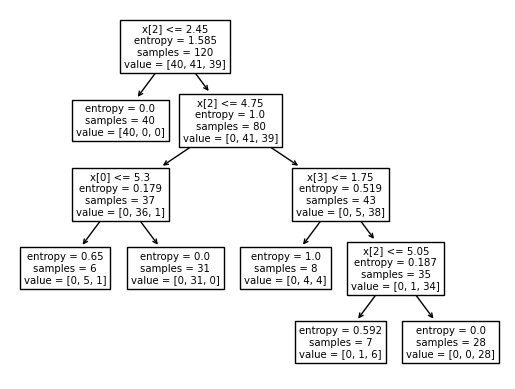

In [24]:
tree.plot_tree(clf)